In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

import os
for dirname, _, filenames in os.walk('/Users/tjeff/Desktop/CODING/project-4/Resources/test_scores.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/Users/tjeff/Desktop/CODING/project-4/Resources/test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
len(df)


2133

In [5]:
df = df.drop_duplicates()
df.shape

(2133, 11)

In [6]:
df.isnull().sum().sort_values(ascending=False)/len(df)


posttest           0.0
pretest            0.0
lunch              0.0
gender             0.0
student_id         0.0
n_student          0.0
teaching_method    0.0
classroom          0.0
school_type        0.0
school_setting     0.0
school             0.0
dtype: float64

In [7]:
df.drop(['school', 'classroom', 'student_id'], axis=1, inplace=True)

In [8]:
print('school_setting',str(df['school_setting'].unique()))
print('school_type',str(df['school_type'].unique()))
print('teaching_method',str(df['teaching_method'].unique()))
print('gender',str(df['gender'].unique()))
print('lunch',str(df['lunch'].unique()))

school_setting ['Urban' 'Suburban' 'Rural']
school_type ['Non-public' 'Public']
teaching_method ['Standard' 'Experimental']
gender ['Female' 'Male']
lunch ['Does not qualify' 'Qualifies for reduced/free lunch']


In [9]:
ohe_binaries = OneHotEncoder(drop='if_binary', sparse = False)
ohe_binaries.fit(df[['school_type', 'teaching_method', 'gender', 'lunch']])
df[['school_type', 'teaching_method', 'gender', 'lunch']] = ohe_binaries.transform(df[['school_type', 'teaching_method', 'gender', 'lunch']])

In [10]:
df.drop('school_setting', axis=1, inplace=True)

<AxesSubplot:>

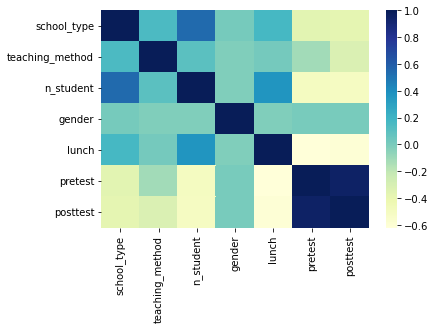

In [11]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [13]:
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation']
corr_df.sort_values(by="correlation",ascending=False, inplace=True)
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]
corr_df.head(10)

,feature_1,feature_2,correlation
47,posttest,pretest,0.950884
41,pretest,posttest,0.950884
2,school_type,n_student,0.548190
14,n_student,school_type,0.548190
30,lunch,n_student,0.367018
18,n_student,lunch,0.367018
4,school_type,lunch,0.171196
28,lunch,school_type,0.171196
7,teaching_method,school_type,0.153593
1,school_type,teaching_method,0.153593


In [14]:
corr_df.correlation.min()

-0.6224203266721798

In [15]:
X = df.drop('posttest', axis=1)
y = df['posttest']

model = LinearRegression()

scores = cross_val_score(model, X, y)
base_model_score = scores.mean()
base_model_score

0.9144738333131347

In [16]:
permut_model = LinearRegression().fit(X, y)
permutation_score = permutation_importance(permut_model, X, y, n_repeats=10)
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False)

,feature,score decrease
5,pretest,1.62169
1,teaching_method,0.0852329
4,lunch,0.00155946
2,n_student,0.00132501
3,gender,2.74272e-05
0,school_type,6.07926e-07


In [17]:
X = df.drop(['posttest', 'school_type', 'gender'], axis=1)
y = df['posttest']
model2 = LinearRegression()
scores = cross_val_score(model2, X, y)
model_score = scores.mean()
model_score

0.9148511987544652